In [1]:
#Import modules
import pandas as pd #data cleaning
import numpy as np
import matplotlib.pyplot as plt #data visualization
import PyPDF2 as pdf #pdf file extract 
import seaborn as sns

In [2]:
#Importing the dataset. r is used to escape the quotes

#Dataset is dated Jan 12 till May 21
df2=pd.read_csv(r'C:\Users\BURROW\data_portfolio\Iowa_Alcohol_sales\data\raw\2019_Iowa_Liquor_Sales.csv',low_memory=False)

#All of the columns will be shown in the dataset
pd.set_option('display.max_columns',None)

In [3]:
#Shows the rows and columns in the dataset.  
#Rows: 2380345   #Columns: 24
df2.shape

(2380345, 24)

In [4]:
df2.describe()

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,2.380345e+06,2.375581e+06,2.375581e+06,2.377427e+06,2.380344e+06,2.380345e+06,2.380345e+06,2.380345e+06,2.380345e+06,2.380345e+06,2.380345e+06,2.380345e+06,2.380345e+06,2.380345e+06
mean,3.903901e+03,5.126670e+04,5.730555e+01,1.052185e+06,2.647152e+02,4.836175e+04,1.242525e+01,8.766395e+02,1.034431e+01,1.551888e+01,1.127750e+01,1.467100e+02,9.368987e+00,2.469610e+00
std,1.138921e+03,9.881870e+02,2.727291e+01,9.329829e+04,1.370791e+02,6.708207e+04,8.108758e+00,5.214263e+02,8.568864e+00,1.285549e+01,3.131091e+01,4.871768e+02,3.824454e+01,1.010336e+01
min,2.106000e+03,5.000200e+04,1.000000e+00,1.011100e+06,3.300000e+01,1.590000e+02,1.000000e+00,2.000000e+01,8.900000e-01,1.340000e+00,1.000000e+00,1.340000e+00,2.000000e-02,0.000000e+00
25%,2.624000e+03,5.031600e+04,3.100000e+01,1.012200e+06,1.150000e+02,2.682800e+04,6.000000e+00,7.500000e+02,5.500000e+00,8.250000e+00,3.000000e+00,3.375000e+01,1.500000e+00,3.900000e-01
50%,3.952000e+03,5.110300e+04,6.200000e+01,1.031200e+06,2.600000e+02,3.817700e+04,1.200000e+01,7.500000e+02,8.250000e+00,1.238000e+01,6.000000e+00,7.536000e+01,4.800000e+00,1.260000e+00
75%,4.971000e+03,5.230200e+04,7.700000e+01,1.062400e+06,3.890000e+02,6.486400e+04,1.200000e+01,1.000000e+03,1.296000e+01,1.944000e+01,1.200000e+01,1.485600e+02,1.050000e+01,2.770000e+00
max,9.042000e+03,5.722200e+04,9.900000e+01,1.901200e+06,9.780000e+02,9.992920e+05,4.800000e+01,6.000000e+03,1.749120e+03,2.623680e+03,6.750000e+03,7.843500e+04,1.181250e+04,3.120530e+03


In [5]:
#Look at the datatypes and memory usage of the dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380345 entries, 0 to 2380344
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               float64
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22  Volume Sold (Liter

In [6]:
#Current memory usage of dataframe
df2.memory_usage(deep=True).sum()


2005028420

In [7]:
#Drop duplicate values in the dataset
df2.drop_duplicates(inplace = True)

#View the number of columns left
df2.shape

(2380345, 24)

In [8]:
#Look at the dataset
df2.isna().sum()

Invoice/Item Number           0
Date                          0
Store Number                  0
Store Name                    0
Address                    4764
City                       4764
Zip Code                   4764
Store Location           219390
County Number              4764
County                     4764
Category                   2918
Category Name              2918
Vendor Number                 1
Vendor Name                   1
Item Number                   0
Item Description              0
Pack                          0
Bottle Volume (ml)            0
State Bottle Cost             0
State Bottle Retail           0
Bottles Sold                  0
Sale (Dollars)                0
Volume Sold (Liters)          0
Volume Sold (Gallons)         0
dtype: int64

#### Observations
1. Change datatypes of columns to reduce memory usage 
2. Remove unncessary columns to reduce memory usage
3. Add two new columns such as profit margin and gross profit
4. Fill or delete null values in the dataframe

In [9]:
#Remove unncessary columns to reduce memory usage 
drop_columns = ['Address','Category','Volume Sold (Gallons)']
df2=df2.drop(columns = drop_columns)

#Check the results 
df2.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'City',
       'Zip Code', 'Store Location', 'County Number', 'County',
       'Category Name', 'Vendor Number', 'Vendor Name', 'Item Number',
       'Item Description', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)'],
      dtype='object')

In [10]:
#Add one new columns to the dataframe 
df2['gross_profit'] = df2['State Bottle Retail'] - df2['State Bottle Cost']

#Make a week column 
df2['week']=pd.to_datetime(df2['Date']).dt.week

#Make a month column 
df2['month']=pd.to_datetime(df2['Date']).dt.month


<ipython-input-10-3a484af8958b>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week']=pd.to_datetime(df2['Date']).dt.week


In [11]:
store_df=pd.read_csv(r'C:\Users\BURROW\data_portfolio\Iowa_Alcohol_sales\data\raw\Iowa_Liquor_Stores.csv')

#Split the store address column into longitude and latitude
split_df=store_df['Store Address'].str.split(expand=True)

#Get the numbers in the column
store_df['longitude']=split_df[1].str.slice(start=1)
store_df['latitude']=split_df[2].str.slice(stop=-1)

subset_df=df2[['Invoice/Item Number','Date','Store Name','Store Number','County Number','County','Category Name','Vendor Name','Vendor Number','Item Number','Item Description','Pack','Bottle Volume (ml)','State Bottle Cost','State Bottle Retail','Bottles Sold','Sale (Dollars)','Volume Sold (Liters)','gross_profit','week','month']]
subset_store_df=store_df[['Store','City','Zip Code','longitude','latitude']]

#Merge the df and store_df to get zip code , city and store location columns
df2=subset_df.merge(subset_store_df,left_on='Store Number',right_on='Store')

#Check the na columns in the dataframe. The county number , county and category name , vendor name are still null
df2.isna().sum()

Invoice/Item Number        0
Date                       0
Store Name                 0
Store Number               0
County Number           4764
County                  4764
Category Name           2918
Vendor Name                1
Vendor Number              1
Item Number                0
Item Description           0
Pack                       0
Bottle Volume (ml)         0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
gross_profit               0
week                       0
month                      0
Store                      0
City                       0
Zip Code                   0
longitude                  0
latitude                   0
dtype: int64

In [12]:
#Load the Iowa_Liquor_Products excel file into a dataframe to get category name
products_df=pd.read_csv(r'C:\Users\BURROW\data_portfolio\Iowa_Alcohol_sales\data\raw\Iowa_Liquor_Products.csv')

#Replace value of x904631 with 904631 in the Item Number column
products_df['Item Number'].replace(to_replace='x904631',value='904631',inplace=True)

#Change the data type of Item Number column from object to int
products_df['Item Number']=products_df['Item Number'].astype(int)

#Merge the products_df and df to get Category name.
subset_df2=df2[['Invoice/Item Number','Date','Store Number','Store Name','Zip Code','City','County','County Number','longitude','latitude','Vendor Name','Vendor Number','Item Number','Item Description','Pack','Bottle Volume (ml)','State Bottle Cost','State Bottle Retail','Bottles Sold','Sale (Dollars)','Volume Sold (Liters)','gross_profit','week','month']]
df2=subset_df2.merge(products_df[['Item Number','Category Name']],on="Item Number")

#Find the null value in vendor name column 
df2[df2['Vendor Name'].isna()]

#Replace the null value in Vendor Name with SAZERAC NORTH AMERICA
df2['Vendor Name'].fillna(value='SAZERAC NORTH AMERICA',inplace=True)

#Check the null values in the dataframe 
#County Name, county number are null
df2.isna().sum()

Invoice/Item Number        0
Date                       0
Store Number               0
Store Name                 0
Zip Code                   0
City                       0
County                  4764
County Number           4764
longitude                  0
latitude                   0
Vendor Name                0
Vendor Number              1
Item Number                0
Item Description           0
Pack                       0
Bottle Volume (ml)         0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
gross_profit               0
week                       0
month                      0
Category Name              0
dtype: int64

In [13]:
df2.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,City,County,County Number,longitude,latitude,Vendor Name,Vendor Number,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),gross_profit,week,month,Category Name
0,INV-16681900011,01/02/2019,5286,Sauce,52240,Iowa City,JOHNSON,52.0,-91.53440003163225,41.6592604920698,MOET HENNESSY USA,420.0,48099,Hennessy VS,24,200,6.24,9.36,24,224.64,4.8,3.12,1,1,Imported Brandies
1,INV-18211500001,03/19/2019,5286,Sauce,52240,Iowa City,JOHNSON,52.0,-91.53440003163225,41.6592604920698,MOET HENNESSY USA,420.0,48099,Hennessy VS,24,200,6.24,9.36,24,224.64,4.8,3.12,12,3,Imported Brandies
2,INV-18940000006,04/23/2019,5286,Sauce,52240,Iowa City,JOHNSON,52.0,-91.53440003163225,41.6592604920698,MOET HENNESSY USA,420.0,48099,Hennessy VS,24,200,6.24,9.36,24,224.64,4.8,3.12,17,4,Imported Brandies
3,INV-20214600005,06/25/2019,5286,Sauce,52240,Iowa City,JOHNSON,52.0,-91.53440003163225,41.6592604920698,MOET HENNESSY USA,420.0,48099,Hennessy VS,24,200,6.24,9.36,24,224.64,4.8,3.12,26,6,Imported Brandies
4,INV-21680700022,09/04/2019,5286,Sauce,52240,Iowa City,JOHNSON,52.0,-91.53440003163225,41.6592604920698,MOET HENNESSY USA,420.0,48099,Hennessy VS,24,200,6.24,9.36,24,224.64,4.8,3.12,36,9,Imported Brandies


In [14]:
#Remove the null values in county and county number (need to think of a better solution) / replace the values
df2.dropna(inplace=True)

In [15]:
#Cleaning the columns

In [16]:
#Rename the columns 

renamed_columns = {'Invoice/Item Number':'invoice_no','Date':'date','Store Number':'store_no','Store Name':'name','City':'city','Zip Code':'zipcode','County Number':'county_no','County':'county','Category Name':'category','Vendor Number':'vendor_no','Vendor Name':'vendor','Item Description':'item','Pack':'pack','Bottle Volume (ml)': 'bottle_vol_ml','State Bottle Cost':'bottle_cost', 'State Bottle Retail':'bottle_retail','Sale (Dollars)':'sales','Bottles Sold':'bottles_sold','Volume Sold (Liters)':'vol_sold_liters',}

#Rename the columns 
df2.rename(columns = renamed_columns,inplace=True)

In [17]:
#Rearrange columns in the df_new dataframe 
df2=df2.reindex(columns=['invoice_no','date','week','month','store_no','name','city','zipcode','latitude','longitude','county_no','county','category','vendor_no','vendor','item','pack','bottle_vol_ml','bottle_cost','bottle_retail','bottles_sold','sales','gross_profit','vol_sold_liters'])

In [18]:
#Cleaning of the columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375581 entries, 0 to 2380345
Data columns (total 24 columns):
 #   Column           Dtype  
---  ------           -----  
 0   invoice_no       object 
 1   date             object 
 2   week             int64  
 3   month            int64  
 4   store_no         int64  
 5   name             object 
 6   city             object 
 7   zipcode          object 
 8   latitude         object 
 9   longitude        object 
 10  county_no        float64
 11  county           object 
 12  category         object 
 13  vendor_no        float64
 14  vendor           object 
 15  item             object 
 16  pack             int64  
 17  bottle_vol_ml    int64  
 18  bottle_cost      float64
 19  bottle_retail    float64
 20  bottles_sold     int64  
 21  sales            float64
 22  gross_profit     float64
 23  vol_sold_liters  float64
dtypes: float64(7), int64(6), object(11)
memory usage: 453.1+ MB


In [19]:
#Cleaning of the columns

In [20]:
#Invoice_no column
#Remove the numbers from the invoice_no column 
df2['invoice_no']= df2['invoice_no'].str.extract(r'(\d\d\d\d\d\d\d\d\d\d\d)')

#Check the results 
df2['invoice_no'].sort_values(ascending=False).unique()

array(['24289100004', '24289100003', '24289100002', ..., '16676600003',
       '16676600002', '16676600001'], dtype=object)

In [21]:
#Date column (mm/dd/yyyy)
#Change the date type from object to datetime64
df2['date']=df2['date'].astype(np.datetime64)

#Change date format to mm/dd/yyyy
df2['date']=df2['date'].dt.strftime('%m-%d-%y')


In [22]:
df2.describe()

,week,month,store_no,county_no,vendor_no,pack,bottle_vol_ml,bottle_cost,bottle_retail,bottles_sold,sales,gross_profit,vol_sold_liters
count,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06,2.375581e+06
mean,2.717519e+01,6.690740e+00,3.904240e+03,5.730556e+01,2.647082e+02,1.242675e+01,8.765394e+02,1.034364e+01,1.551788e+01,1.128143e+01,1.467514e+02,5.174242e+00,9.371323e+00
std,1.505734e+01,3.449340e+00,1.139064e+03,2.727292e+01,1.370805e+02,8.110574e+00,5.214043e+02,8.570997e+00,1.285871e+01,3.132145e+01,4.872925e+02,4.292025e+00,3.824600e+01
min,1.000000e+00,1.000000e+00,2.106000e+03,1.000000e+00,3.300000e+01,1.000000e+00,2.000000e+01,8.900000e-01,1.340000e+00,1.000000e+00,1.340000e+00,-4.000000e+00,2.000000e-02
25%,1.400000e+01,4.000000e+00,2.624000e+03,3.100000e+01,1.150000e+02,6.000000e+00,7.500000e+02,5.500000e+00,8.250000e+00,3.000000e+00,3.375000e+01,2.750000e+00,1.500000e+00
50%,2.700000e+01,7.000000e+00,3.952000e+03,6.200000e+01,2.600000e+02,1.200000e+01,7.500000e+02,8.250000e+00,1.238000e+01,6.000000e+00,7.536000e+01,4.130000e+00,4.800000e+00
75%,4.000000e+01,1.000000e+01,4.972000e+03,7.700000e+01,3.890000e+02,1.200000e+01,1.000000e+03,1.296000e+01,1.944000e+01,1.200000e+01,1.485600e+02,6.480000e+00,1.050000e+01
max,5.200000e+01,1.200000e+01,9.042000e+03,9.900000e+01,9.780000e+02,4.800000e+01,6.000000e+03,1.749120e+03,2.623680e+03,6.750000e+03,7.843500e+04,8.745600e+02,1.181250e+04


In [23]:
#Create a new column which is a sub category of the main category
condition=[df2.category=='100% Agave Tequila', df2.category=='Aged Dark Rum', 
       df2.category=='American Brandies',
       df2.category=='American Cordials & Liqueurs',
       df2.category=='American Distilled Spirits Specialty', df2.category=='American Dry Gins',
       df2.category=='American Flavored Vodka', df2.category=='American Schnapps',
       df2.category=='American Sloe Gins', df2.category=='American Vodkas', df2.category=='American Whiskies',
       df2.category=='Blended Whiskies', df2.category=='Bottled in Bond Bourbon', df2.category=='Canadian Whiskies',
       df2.category=='Cocktails/RTD', df2.category=='Coffee Liqueurs', df2.category=='Corn Whiskies',
       df2.category=='Cream Liqueurs', df2.category=='Flavored Gin', df2.category=='Flavored Rum', df2.category=='Gold Rum',
       df2.category=='Imported Brandies', df2.category=='Imported Cordials & Liqueurs',
       df2.category=='Imported Distilled Spirits Specialty', df2.category=='Imported Dry Gins',
       df2.category=='Imported Flavored Vodka', df2.category=='Imported Gins', df2.category=='Imported Schnapps',
       df2.category=='Imported Vodkas', df2.category=='Imported Whiskies', df2.category=='Iowa Distilleries',
       df2.category=='Irish Whiskies', df2.category=='Mezcal', df2.category=='Mixto Tequila',
       df2.category=='Neutral Grain Spirits', df2.category=='Neutral Grain Spirits Flavored',
       df2.category=='Scotch Whiskies', df2.category=='Single Barrel Bourbon Whiskies',
       df2.category=='Single Malt Scotch', df2.category=='Special Order Items', df2.category=='Spiced Rum',
       df2.category=='Straight Bourbon Whiskies', df2.category=='Straight Rye Whiskies',
       df2.category=='Temporary & Specialty Packages', df2.category=='Tennessee Whiskies',
       df2.category=='Triple Sec', df2.category=='Whiskey Liqueur', df2.category=='White Rum']

choice=['Tequila','Rum','Brandy','Others','Others','Gin','Vodka','Liqueur','Gin','Vodka',
       'Whiskey','Whiskey','Others','Whiskey','Cocktails','Liqueur',
       'Whiskey','Liqueur','Gin','Rum','Rum','Brandy','Others','Others','Gin','Vodka',
       'Gin','Liqueur','Vodka','Whiskey','Others','Whiskey','Others','Others','Others',
        'Others','Whiskey','Whiskey','Whiskey','Others','Rum','Whiskey','Whiskey','Others',
        'Whiskey','Liqueur','Liqueur','Rum']

df2['sub_category']=np.select(condition,choice)

In [24]:
#Rearrange sub_category column after category column
df2=df2[['invoice_no', 'date', 'week', 'month', 'store_no', 'name', 'city',
       'zipcode', 'latitude', 'longitude', 'county_no', 'county', 'category','sub_category',
       'vendor_no', 'vendor', 'item', 'pack', 'bottle_vol_ml', 'bottle_cost',
       'bottle_retail', 'bottles_sold', 'sales', 'gross_profit',
       'vol_sold_liters']]

In [25]:
#Store No column 
#Change the data type of store_no column from int64 to int16 
df2['store_no']=df2['store_no'].astype(np.int16)

#Check result
df2['store_no'].dtypes

dtype('int16')

In [26]:
#Name column 

#Change the text format to title
df2['name']=df2['name'].str.title()

#Split the name column into two and take the name column only
splitname=df2['name'].str.split(pat='/',expand=True)

#Take the first column of splitname and put in into name column
df2['name']=splitname[0]


In [27]:
#City column 

#Standardize all the values to title format 
df2['city']=df2['city'].str.title()

#Check the unique values in the city column
df2['city'].sort_values(ascending=True).unique()

#Change the city called Arnold'S Park to Arnolds Park 
df2['city']=df2['city'].replace(["Arnold'S Park",'Clearlake','Mount Pleasant','Mount Ayr','Mount Vernon','Leclaire','Lonetree','Saint Ansgar','Grand Mounds'],['Arnolds Park','Clear Lake','Mt Pleasant','Mt Ayr','Mt Vernon','Le Claire','Lone Tree','St Ansgar','Grand Mound'])

#Check the unique values in the city column 
df2['city'].sort_values(ascending=True).unique()

array(['Ackley', 'Adair', 'Adel', 'Afton', 'Akron', 'Albert City',
       'Albia', 'Albion', 'Alburnett', 'Alden', 'Algona', 'Allison',
       'Alta', 'Alton', 'Altoona', 'Amana', 'Ames', 'Anamosa', 'Anita',
       'Ankeny', 'Anthon', 'Aplington', 'Arlington', 'Armstrong',
       'Arnolds Park', 'Atkins', 'Atlantic', 'Audubon', 'Aurelia',
       'Avoca', 'Baldwin', 'Bancroft', 'Baxter', 'Bedford',
       'Belle Plaine', 'Bellevue', 'Belmond', 'Bettendorf', 'Bevington',
       'Blairstown', 'Bloomfield', 'Blue Grass', 'Bondurant', 'Boone',
       'Britt', 'Brooklyn', 'Buffalo', 'Buffalo Center', 'Burlington',
       'Bussey', 'Calmar', 'Camanche', 'Carlisle', 'Carroll',
       'Carter Lake', 'Cascade', 'Casey', 'Cedar Falls', 'Cedar Rapids',
       'Center Point', 'Centerville', 'Central City', 'Chariton',
       'Charles City', 'Cherokee', 'Clarence', 'Clarinda', 'Clarion',
       'Clarksville', 'Clear Lake', 'Clermont', 'Clinton', 'Clive',
       'Coggon', 'Colfax', 'Colo', 'Columbus 

In [28]:
#County no column
#Change the data type from float to int 8. Int8 can take up to 127
df2['county_no']=df2['county_no'].astype(np.int8)


In [29]:
#County column
#Change the text format to title
df2['county']=df2['county'].str.title()

In [30]:
#Vendor column 
#Change the text type to title 
df2['vendor']=df2['vendor'].str.title()

In [31]:
#Vendor no column 
df2['vendor_no']=df2['vendor_no'].astype(np.int16)

In [32]:
#Pack column 
#Change the datatype from int64 to int 8
df2['pack']=df2['pack'].astype(np.int8)

In [33]:
#Bottle_vol_ml
#Change the data type from int64 to int16
df2['bottle_vol_ml']=df2['bottle_vol_ml'].astype(np.int16)

In [34]:
#Bottles cost
#Change the data type from float64 to float16
df2['bottle_cost']=df2['bottle_cost'].astype(np.float16)

In [35]:
#Bottles retail 
#Change the data type from float 64 to float 16
df2['bottle_retail']=df2['bottle_retail'].astype(np.float16)

In [36]:
#Bottles sold 
#Change the data type from int64 to int16
df2['bottles_sold']=df2['bottles_sold'].astype(np.int16)


In [37]:
#Sales column
#Change data type from float 64 to float 32
df2['sales']=df2['sales'].astype(np.float32)


In [38]:
#gross profit
#Change the data type from float64 to float 16
df2['gross_profit']=df2['gross_profit'].astype(np.float16)

In [39]:
#vol_sold_liters column

#Change the data type from float64 to float16
df2['vol_sold_liters']=df2['vol_sold_liters'].astype(np.float16)
# #Round to no decimal place 
# df2['vol_sold_liters']=df2['vol_sold_liters'].round()

In [40]:
#Category column 

#Replace the category values to a standard value
df2.replace(to_replace=['American Cordials & Liqueur','American Distilled Spirit Specialty','American Vodka','Cocktails /RTD','Imported Cordials & Liqueur','Imported Distilled Spirit Specialty','Imported Vodka','Temporary &  Specialty Packages'], value=['American Cordials & Liqueurs','American Distilled Spirits Specialty','American Vodkas','Cocktails/RTD','Imported Cordials & Liqueurs','Imported Distilled Spirits Specialty','Imported Vodkas','Temporary & Specialty Packages'],inplace=True)

#Check the category values
df2['category'].sort_values(ascending=True).unique()

array(['100% Agave Tequila', 'Aged Dark Rum', 'American Brandies',
       'American Cordials & Liqueurs',
       'American Distilled Spirits Specialty', 'American Dry Gins',
       'American Flavored Vodka', 'American Schnapps',
       'American Sloe Gins', 'American Vodkas', 'American Whiskies',
       'Blended Whiskies', 'Bottled in Bond Bourbon', 'Canadian Whiskies',
       'Cocktails/RTD', 'Coffee Liqueurs', 'Corn Whiskies',
       'Cream Liqueurs', 'Flavored Gin', 'Flavored Rum', 'Gold Rum',
       'Imported Brandies', 'Imported Cordials & Liqueurs',
       'Imported Distilled Spirits Specialty', 'Imported Dry Gins',
       'Imported Flavored Vodka', 'Imported Gins', 'Imported Schnapps',
       'Imported Vodkas', 'Imported Whiskies', 'Iowa Distilleries',
       'Irish Whiskies', 'Mezcal', 'Mixto Tequila',
       'Neutral Grain Spirits', 'Neutral Grain Spirits Flavored',
       'Scotch Whiskies', 'Single Barrel Bourbon Whiskies',
       'Single Malt Scotch', 'Special Order Items', 

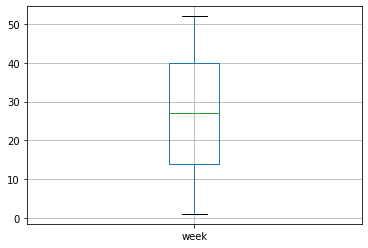

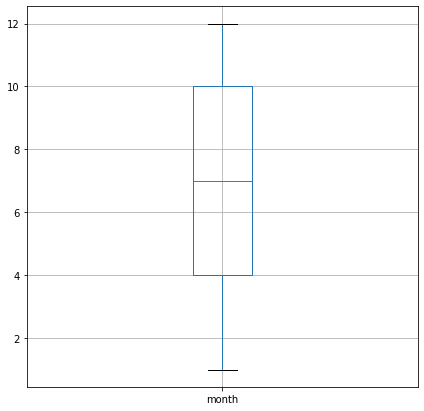

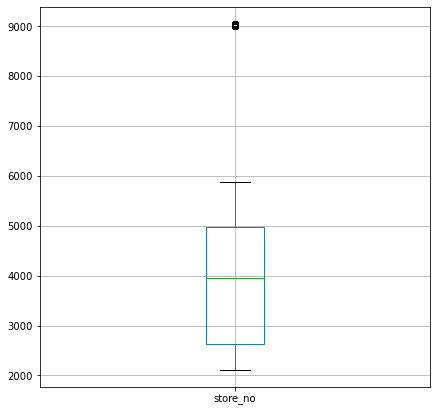

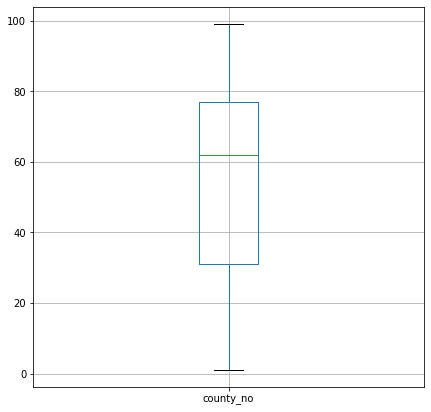

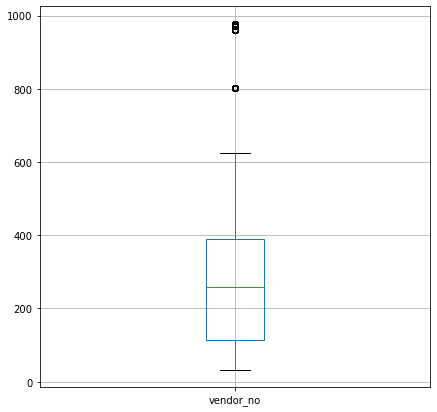

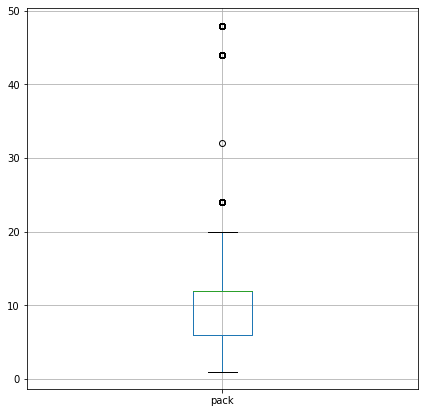

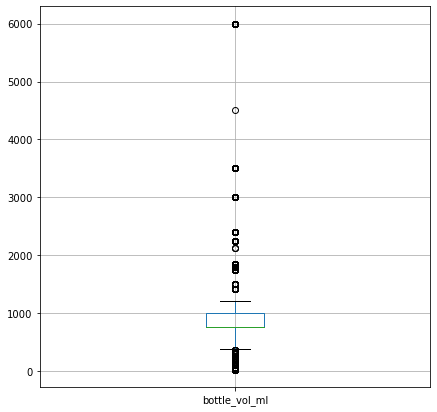

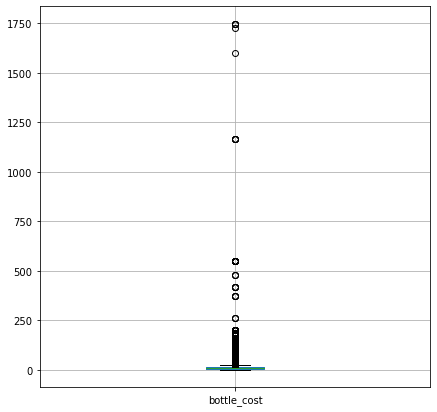

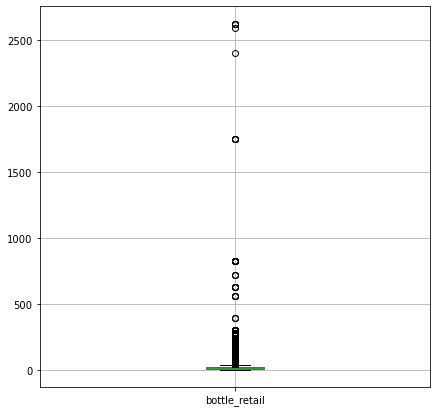

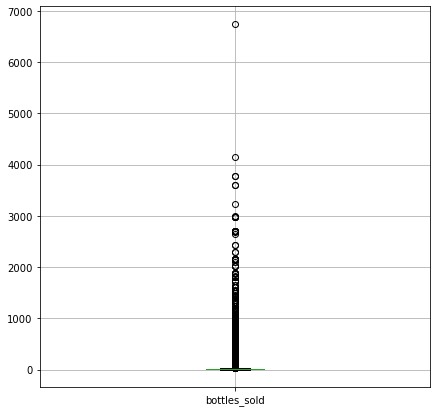

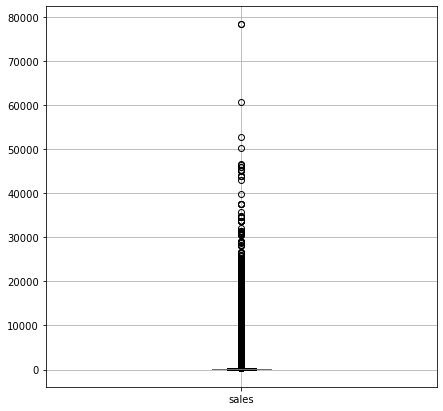

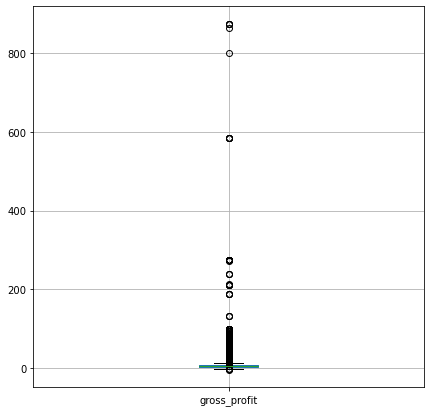

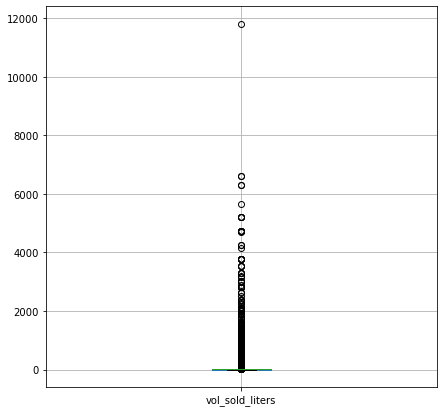

<Figure size 504x504 with 0 Axes>

In [41]:
#Check for outliers 
#Use boxplot to check for outliers for continous variables only 

#Subset all numerical values into a dataframe
df_numbers=df2.select_dtypes(include='number')

#Identify the outliers in the dataframe
for column in df_numbers:
    df_numbers.boxplot([column])
    plt.figure(figsize=[7,7]) 


In [42]:
print('Although there are outliers in the boxplot, however they are not incorrect values. Hence they need not be removed')

Although there are outliers in the boxplot, however they are not incorrect values. Hence they need not be removed


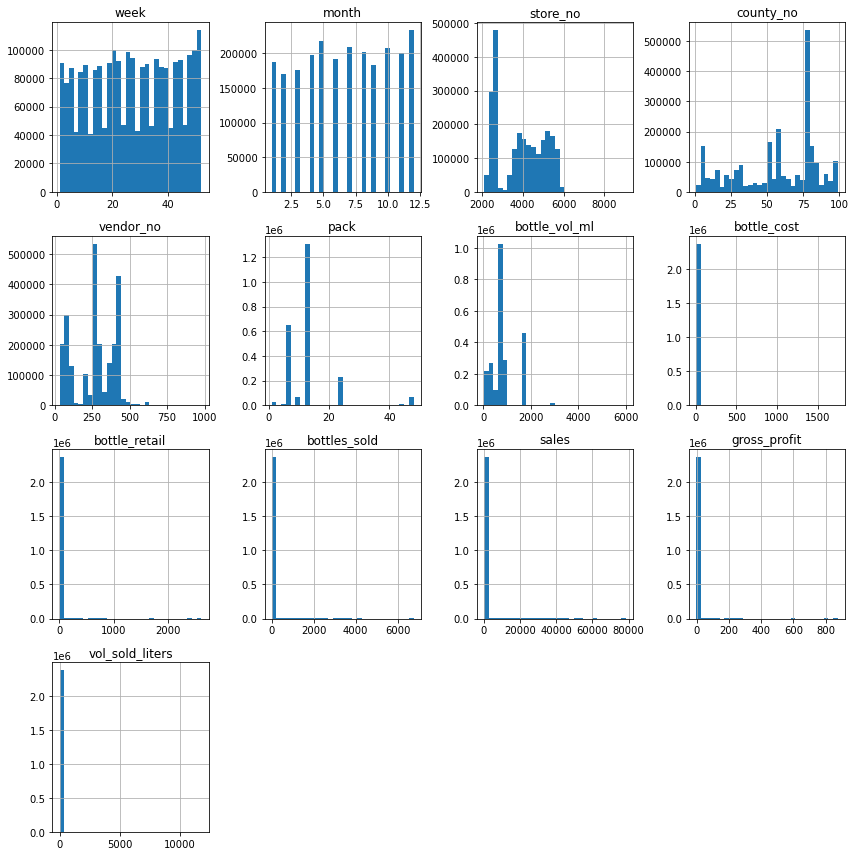

In [43]:
#Check the distribution of the data (numerical values)

#Plot a histogram for the entire dataframe 
df_numbers.hist(figsize=[12,12],bins=30)
plt.tight_layout()


In [44]:
#Check memory usage of edited dataframe
df2.memory_usage(deep=True).sum()

new_memory=1741197700
old_memory=2005028420

#Percentage reduction of dataset: 13.4%
memory_reduction=(old_memory-new_memory) / old_memory * 100

#Phrase
print('Percentage of memory usage reduction: ',memory_reduction)

Percentage of memory usage reduction:  13.158452886169064


In [45]:
#Split the dataframe into the first 800k rows
df2_p1=df2[:800000]

#Split the dataframe into the second 800k rows
df2_p2=df2[800000:1600000]

#Split the dataframe into the last 755k rows
df2_p3=df2[1600000:]

In [46]:
#Export the cleaned dataframe part 1 into xls file
df2_p1.to_excel('C:/Users/BURROW/data_portfolio/Iowa_Alcohol_sales/data/processed/2019_Iowa_Liquor_Sales_cleaned_p1.xlsx')

#Export the cleaned dataframe part 2 into xls file
df2_p2.to_excel('C:/Users/BURROW/data_portfolio/Iowa_Alcohol_sales/data/processed/2019_Iowa_Liquor_Sales_cleaned_p2.xlsx')

#Export the cleaned dataframe part 3 into xls file
df2_p3.to_excel('C:/Users/BURROW/data_portfolio/Iowa_Alcohol_sales/data/processed/2019_Iowa_Liquor_Sales_cleaned_p3.xlsx')

In [47]:
#Export the cleaned dataframe into csv file
df2.to_csv('C:/Users/BURROW/data_portfolio/Iowa_Alcohol_sales/data/processed/2019_Iowa_Liquor_Sales_cleaned.csv')